In [4]:
import tensorflow as tf

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
y_test.shape

(10000,)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [12]:
y_train[18459]

6

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

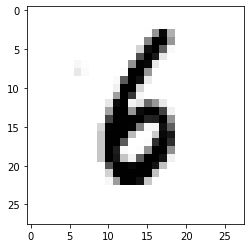

In [14]:
plt.imshow(X_train[18459], cmap='Greys')

In [15]:
# Reshaping the array to 4-dims so that it can work with the Keras API
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [16]:
X_train[3682, 5, 14, 0]

0

In [17]:
X_train[16849, 12, 2, 0]

0

In [18]:
X_train[58169, 11, 16, 0]

254

In [19]:
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Using TensorFlow backend.


In [21]:
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [22]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=X_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.2080 - accuracy: 0.9376
Epoch 2/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0827 - accuracy: 0.9750
Epoch 3/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0590 - accuracy: 0.9811
Epoch 4/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0454 - accuracy: 0.9853
Epoch 5/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0377 - accuracy: 0.9878
Epoch 6/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0297 - accuracy: 0.9898
Epoch 7/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0261 - accuracy: 0.9911
Epoch 8/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0226 - accuracy: 0.9924
Epoch 9/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0223 - accuracy: 0.9926
Epoch 10/10
60000/60000 [==============================

In [23]:
#model.evaluate(x_test, y_test)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [25]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 5s 490us/step


[0.05484694091673191, 0.9873999953269958]